<a href="https://colab.research.google.com/github/manjusreekc/Book-Recommendation-System/blob/main/Book_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Book Recommendation System**
###A recommendation engine is a class of machine learning which offers relevant suggestions to the customer. It helps an organization to create loyal customers and build trust by them desired products and services for which they came on your site. The recommendation system today are so powerful that they can handle the new customer too who has visited the site for the first time. They recommend the products which are currently trending or highly rated and they can also recommend the products which bring maximum profit to the company.
###A book recommendation system is a type of recommendation system where we have to recommend similar books to the reader based on his interest. The books recommendation system is used by online websites which provide ebooks like google play books, open library, good Read’s, etc.

In [1]:
#mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# loading the required libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import re

In [3]:
drive_path = '/content/drive/MyDrive/Book Recommendation System/data_book_recommendation/'

books_df=pd.read_csv(drive_path +"Books.csv")
ratings_df=pd.read_csv(drive_path +"Ratings.csv")
users_df=pd.read_csv(drive_path +"Users.csv")

#**Pre-processing of datasets**

####We have three different datasets which contains details of books, users and book ratings. Let's deep dive into each of those datasets.

##**Books**

In [4]:
#first look
books_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [5]:
#Checking basic information
books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


####The last three columns contains no information that helps in the analysis process, hence we consider only the first 5 columns for further process.

In [6]:
#Taking the required subset
books_df=books_df[["ISBN","Book-Title","Book-Author",	"Year-Of-Publication", "Publisher"]]

In [7]:
# Checking for null values
books_df.isnull().sum() 

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
dtype: int64

In [8]:
#obtaining the rows that contain null values
books_df[books_df.isnull().any(axis=1)]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing


####We can see that the column Book-Author contains one null value and the column Publisher contains two null values. Therefore we replace them by 'Unknown'.

In [9]:
#Replacing null values by 'Unknown'
books_df.fillna("Unknown",inplace=True)

In [10]:
#Checking the datatype 
books_df.dtypes

ISBN                   object
Book-Title             object
Book-Author            object
Year-Of-Publication    object
Publisher              object
dtype: object

In [11]:
#Obtaining the unique years 
books_df["Year-Of-Publication"].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

####While checking the unique years we can see that two years are mistakenly replaced by some text. Let's try to fix this issue.

In [12]:
pd.set_option('display.max_colwidth', -1)

In [13]:
books_df[books_df["Year-Of-Publication"]=='Gallimard']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-Marie Gustave Le ClÃ?Â©zio""",2003,Gallimard,http://images.amazon.com/images/P/2070426769.01.THUMBZZZ.jpg


In [14]:
books_df[books_df["Year-Of-Publication"]=='DK Publishing Inc']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)\"";Michael Teitelbaum""",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.01.THUMBZZZ.jpg
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)\"";James Buckley""",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.01.THUMBZZZ.jpg


#### We can see that for these three rows, the values have been interchanged mistakenly. So we will correct this mistake.

In [15]:
#Interchanging the values
books_df.at[209538 ,'Book-Title'] = 'DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)'
books_df.at[209538 ,'Book-Author'] = 'Michael Teitelbaum'
books_df.at[209538 ,'Publisher'] = 'DK Publishing Inc'
books_df.at[209538 ,'Year-Of-Publication'] = '2000'

books_df.at[221678 ,'Book-Title'] = 'DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)'
books_df.at[221678 ,'Book-Author'] = 'James Buckley'
books_df.at[221678 ,'Publisher'] = 'DK Publishing Inc'
books_df.at[221678 ,'Year-Of-Publication'] = '2000'

books_df.at[220731 ,'Book-Title'] = 'Peuple du ciel - Suivi de Les bergers '
books_df.at[220731 ,'Book-Author'] = 'Jean-Marie Gustave Le ClÃ?Â©zio'
books_df.at[220731 ,'Publisher'] = 'Gallimard'
books_df.at[220731 ,'Year-Of-Publication'] = '2003'

In [16]:
#Converting year into int 
books_df['Year-Of-Publication'] = books_df['Year-Of-Publication'].astype(int)

In [17]:
#Checking info
books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271360 non-null  object
 3   Year-Of-Publication  271360 non-null  int64 
 4   Publisher            271360 non-null  object
dtypes: int64(1), object(4)
memory usage: 10.4+ MB


In [18]:
#Getting the years in ascending order
print(sorted(list(books_df['Year-Of-Publication'].unique())))

[0, 1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908, 1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012, 2020, 2021, 2024, 2026, 2030, 2037, 2038, 2050]


####In the column Year of Publication there are invalid values such as 0 and greater than the present year. We will replace such values by mode.


In [19]:
#Imputing invalid values by mode
print("The mode of year of publication is:",books_df['Year-Of-Publication'].mode()[0])
books_df[books_df['Year-Of-Publication'] > 2021] = books_df['Year-Of-Publication'].mode()[0]
books_df[books_df['Year-Of-Publication'] == 0] = books_df['Year-Of-Publication'].mode()[0]
#Checking for unique years after replacement
print(sorted(list(books_df['Year-Of-Publication'].unique())))

The mode of year of publication is: 2002
[1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908, 1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012, 2020, 2021]


In [20]:
# Uppercasing all alphabets in ISBN
books_df['ISBN'] = books_df['ISBN'].str.upper()


In [21]:
#checking for duplicates
print("Number of duplicates is:",len(books_df[books_df.duplicated()]))

Number of duplicates is: 4936


In [22]:
# Drop duplicate rows
books_df.drop_duplicates(keep='last', inplace=True)
books_df.reset_index(drop=True, inplace=True)

In [23]:
#Checking for the shape
print("The shape of users_df is",books_df.shape)

The shape of users_df is (266424, 5)


##**Users**

In [24]:
#first look
users_df.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [25]:
#checking basic info
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [26]:
# checking for null values
users_df.isnull().sum()

User-ID     0     
Location    0     
Age         110762
dtype: int64

In [27]:
# checking for unique values
print(sorted(list(users_df['Age'].unique())))

[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 113.0, 114.0, 115.0, 116.0, 118.0, 119.0, 123.0, 124.0, 127.0, 128.0, 132.0, 133.0, 136.0, 137.0, 138.0, 140.0, 141.0, 143.0, 146.0, 147.0, 148.0, 151.0, 152.0, 156.0, 157.0, 159.0, 162.0, 168.0, 172.0, 175.0, 183.0, 186.0, 189.0, 199.0, 200.0, 201.0, 204.0, 207.0, 208.0, 209.0, 210.0, 212.0, 219.0, 220.0, 223.0, 226.0

###There are so many invalid entries in this column. So we will replace those with median. Here we will fix the lower age limit as 10 and upper age limit as 90.

In [28]:
# Imputing invalid entries with nan
users_df.loc[(users_df.Age > 90) | (users_df.Age < 10), 'Age'] = np.nan
#filling nan with median
users_df.Age = users_df.Age.fillna(users_df.Age.median())
#converting datatype to integer
users_df.Age = users_df.Age.astype(np.int32)
#checking unique age after replacement
print(sorted(users_df.Age.unique()))

[10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90]


In [29]:
#Examining Location
users_df['Location']

0         nyc, new york, usa                
1         stockton, california, usa         
2         moscow, yukon territory, russia   
3         porto, v.n.gaia, portugal         
4         farnborough, hants, united kingdom
                         ...                
278853    portland, oregon, usa             
278854    tacoma, washington, united kingdom
278855    brampton, ontario, canada         
278856    knoxville, tennessee, usa         
278857    dublin, n/a, ireland              
Name: Location, Length: 278858, dtype: object

###Since the location is given in city,state,country format, we will now extract these from location.

In [30]:
#Creating a list for each location 
sep_list = users_df.Location.str.split(', ')
#Creating empty lists to store city, state and country  
city = []
state = []
country = []

for i in range(0,len(sep_list)):
     #removing invalid entries 
    if sep_list[i][0] == ' ' or sep_list[i][0] == '' or sep_list[i][0]=='n/a' or sep_list[i][0] == ',': 
        city.append('other')
    else:
        city.append(sep_list[i][0].lower())
    
    #if the sep_list contains only city
    if(len(sep_list[i])<2):
        state.append('other')
        country.append('other')
    else:
        #removing invalid entries
        if sep_list[i][1] == ' ' or sep_list[i][1] == '' or sep_list[i][1]=='n/a' or sep_list[i][1] == ',':    
            state.append('other')      
        else:
            state.append(sep_list[i][1].lower())
        
        #if the sep_list contains only city and country
        if(len(sep_list[i])<3):
            country.append('other')
        else:
            #removing invalid entries
            if sep_list[i][2] == ''or sep_list[i][1] == ',' or sep_list[i][2] == ' ' or sep_list[i][2] == 'n/a':
                country.append('other')
            else:
                country.append(sep_list[i][2].lower())

#Removing location column       
users_df = users_df.drop('Location',axis=1)
temp = []

#handling cases in which entries are in the form city/stat
for ent in city:
    c = ent.split('/')            
    temp.append(c[0])

#creating dataframes for city, state and country
df_city = pd.DataFrame(temp,columns=['City'])
df_state = pd.DataFrame(state,columns=['State'])
df_country = pd.DataFrame(country,columns=['Country'])

#concatenating these dataframe with users_df
users_df = pd.concat([users_df, df_city], axis=1)
users_df = pd.concat([users_df, df_state], axis=1)
users_df = pd.concat([users_df, df_country], axis=1)


In [31]:
#new users_df
users_df.head()

,User-ID,Age,City,State,Country
0,1,32,nyc,new york,usa
1,2,18,stockton,california,usa
2,3,32,moscow,yukon territory,russia
3,4,17,porto,v.n.gaia,portugal
4,5,32,farnborough,hants,united kingdom


In [32]:
#checking for duplicates
print("Number of duplicates is:",len(users_df[users_df.duplicated()]))

Number of duplicates is: 0


In [33]:
#checking shape
print("The shape of users_df is",users_df.shape)

The shape of users_df is (278858, 5)


##**Ratings**

In [34]:
#basic info
ratings_df.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [35]:
#checking basic info
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


###Since there are chances of presence of extra characters in ISBN in ratings dataset, we will remove these extra characters.

In [36]:
bookISBN = books_df['ISBN'].tolist()
#Storing any character other than any combination of letters and digits case insensitive
reg = "[^A-Za-z0-9]" 

for index, row_Value in ratings_df.iterrows():
  #Searching for special characters in ratings_df.ISBN
    z = re.search(reg, row_Value['ISBN'])    
    
    if z:
      #Deleting special characters 
        f = re.sub(reg,"",row_Value['ISBN'])
        
        #Checking if the cleaned book id is in books_df or not
        if f in bookISBN:
          #If True we will replace the value with cleaned bookid.If false we will kepp it as itself.Because later while taking inner join it wont affect.
            ratings_df.at[index , 'ISBN'] = f

# Uppercasing all alphabets in ISBN
ratings_df['ISBN'] = ratings_df['ISBN'].str.upper()

In [37]:
#checking for duplicates
print("Number of duplicates is:",len(ratings_df[ratings_df.duplicated()]))

Number of duplicates is: 4


In [38]:
#Dropping duplicates
ratings_df.drop_duplicates(keep='last', inplace=True)
#Removing original index
ratings_df.reset_index(drop = True, inplace = True)

In [39]:
#checking shape
ratings_df.shape

(1149776, 3)

###Now we will combine these three pre-processed dataframes.

In [40]:
#merging
combined_df = pd.merge(books_df, ratings_df, on='ISBN', how='inner')
combined_df = pd.merge(combined_df, users_df, on='User-ID', how='inner')
#basic info
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017530 entries, 0 to 1017529
Data columns (total 11 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   ISBN                 1017530 non-null  object
 1   Book-Title           1017530 non-null  object
 2   Book-Author          1017530 non-null  object
 3   Year-Of-Publication  1017530 non-null  int64 
 4   Publisher            1017530 non-null  object
 5   User-ID              1017530 non-null  int64 
 6   Book-Rating          1017530 non-null  int64 
 7   Age                  1017530 non-null  int32 
 8   City                 1017530 non-null  object
 9   State                1017530 non-null  object
 10  Country              1017530 non-null  object
dtypes: int32(1), int64(3), object(7)
memory usage: 89.3+ MB


In [41]:
#checking shape 
print("The shape of combined_df is",combined_df.shape)

The shape of combined_df is (1017530, 11)


#**EDA**

In [42]:
#creating copy
df=combined_df.copy()

In [43]:
#first look
df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating,Age,City,State,Country
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,2,0,18,stockton,california,usa
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8,5,32,timmins,ontario,canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,8,0,32,timmins,ontario,canada
3,0374157065,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,Gina Bari Kolata,1999,Farrar Straus Giroux,8,0,32,timmins,ontario,canada
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,8,0,32,timmins,ontario,canada


In [44]:
#unique values of Book-rating
df['Book-Rating'].unique()

array([ 0,  5,  6,  7,  9, 10,  8,  3,  1,  4,  2])

###Since our dataset contains rating value of 0 and usually ratings are given on a scale of 1-10, we will remove 0 ratings.  

In [45]:
#Remove 0 ratings
df=df[~(combined_df["Book-Rating"]==0)]

In [46]:
df['Book-Rating'].value_counts()

8     90426
10    70277
7     65357
9     59924
5     44750
6     31194
4     7497 
3     5037 
2     2334 
1     1461 
Name: Book-Rating, dtype: int64

In [47]:
#checking shape
print("The shape of dataset after removing 0 ratings is",df.shape)

The shape of dataset after removing 0 ratings is (378257, 11)


###Now let's try to get some insights regarding the data.

###**1. Most Rated Books**

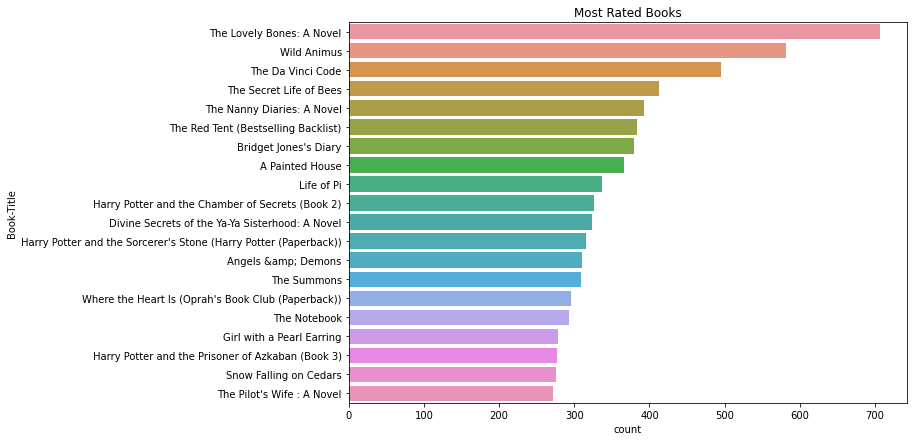

In [48]:
# Most Rated Books
most_rated = df['Book-Title'].value_counts().reset_index()
most_rated.columns = ['Book-Title','count']

plt.figure(figsize = (10,7))
plt.title("Most Rated Books")
sns.barplot(x = 'count', y = 'Book-Title', data = most_rated.head(20))
plt.show()

###Findings:




*  'The Lovely Bones:A Novel' is the book with the highest number of ratings.


*  It is followed by 'Wild Animus' and 'The Da Vinci Code'









###**2. Top Book-Authors**

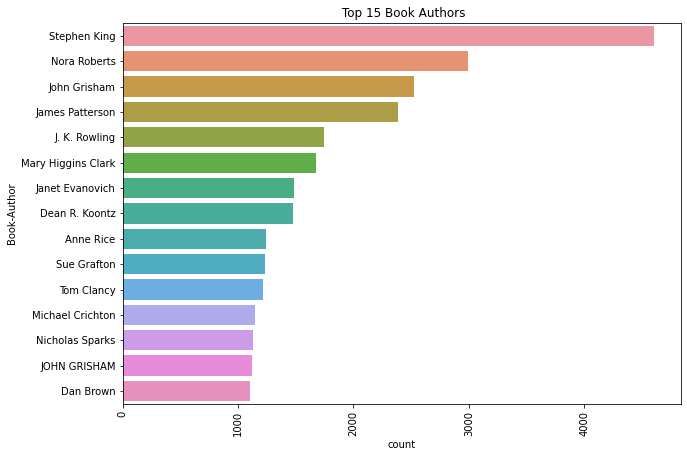

In [49]:
# Top 15 book authors by number of interactions
plt.figure(figsize=(10,7))
sns.countplot(y="Book-Author",order=df['Book-Author'].value_counts().index[0:15],data=df).tick_params(axis='x', rotation=90)
plt.title(" Top 15 Book Authors")
plt.show()

###Findings:


*  Analyzing the given data, one can conclude that Stephan King's books received the most number of ratings. 




### **Authors with the highest number of books**

In [50]:
#finding authors with the highest number of books
most_books = df.groupby('Book-Author').agg({'Book-Title':"nunique"}).sort_values(by='Book-Title',ascending=False)
most_books.rename(columns={'Book-Title':'Number of Books'},inplace=True)
most_books.reset_index(inplace=True)
most_books=most_books[:15]
most_books.head()

,Book-Author,Number of Books
0,William Shakespeare,343
1,Agatha Christie,308
2,Stephen King,283
3,Barbara Cartland,279
4,Nora Roberts,211


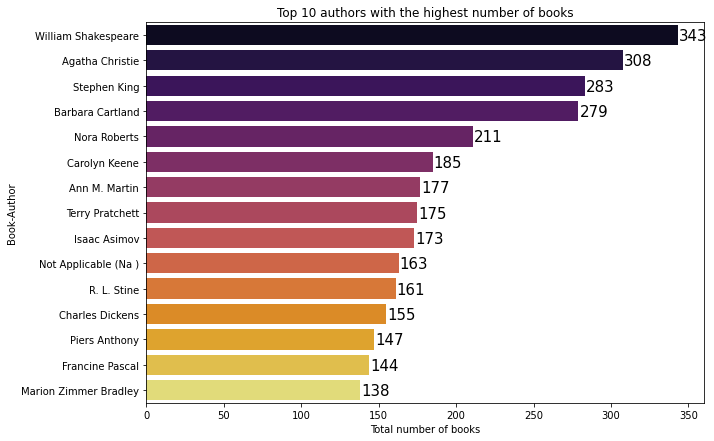

In [51]:
#plotting top 15 authors and number of books 
plt.figure(figsize=(10,7))
ax = sns.barplot(most_books['Number of Books'], most_books["Book-Author"], palette='inferno')
ax.set_title("Top 10 authors with the highest number of books")
ax.set_xlabel("Total number of books")
totals = []
# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.60, i.get_y()+.60,str(round(i.get_width())), fontsize=15,color='black')
plt.show()

###Findings:


*  In the given dataset, the author with the highest number of books is William Shakespare, followed by Agatha Christie.



###**3. Top 15 Book-Publishers**

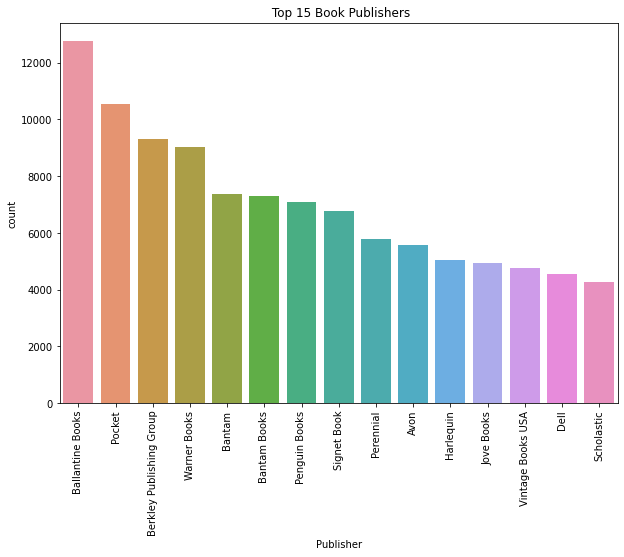

In [52]:
#plotting top 15 book publishers
plt.figure(figsize=(10,7))
sns.countplot(x="Publisher",order=df['Publisher'].value_counts().index[0:15],data=df).tick_params(axis='x', rotation=90)
plt.title(" Top 15 Book Publishers")
plt.show()

###Findings:




*   Top publishers on the basis of the number of ratings received for their books are 'Ballantine Books' and 'Pocket'.






###**4. Number of ratings from each city**

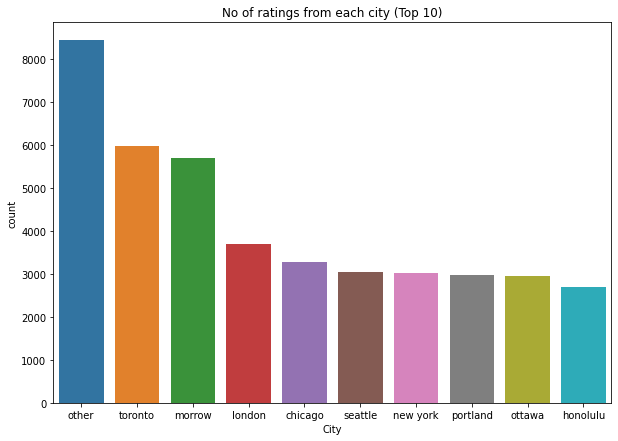

In [53]:
#plotting top 10 cities on the basis of number of ratings 
plt.figure(figsize=(10,7))
sns.countplot(x="City",order=df['City'].value_counts().index[0:10],data=df).tick_params
plt.title("No of ratings from each city (Top 10)")
plt.show()

###**5. Number of ratings from each State**

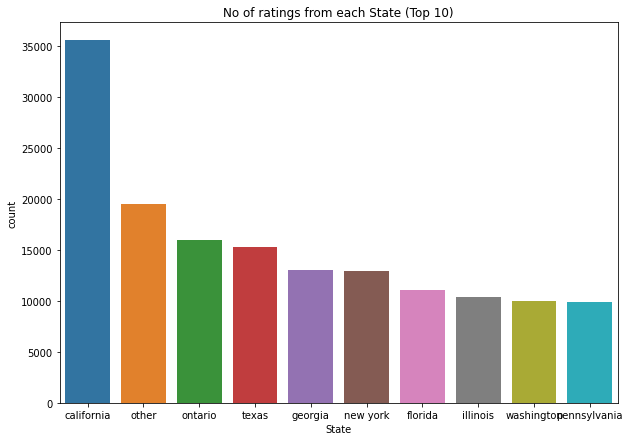

In [54]:
plt.figure(figsize=(10,7))
sns.countplot(x="State",order=df['State'].value_counts().index[0:10],data=df)
plt.title("No of ratings from each State (Top 10)")
plt.show()

###Findings:




* California is the state from which the highest number of ratings are given.

###**6. Number of ratings from each Country**

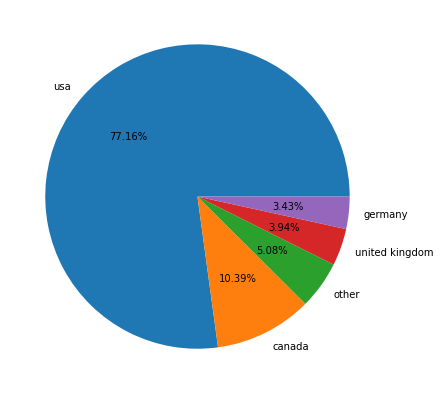

In [55]:
# Top Countries
Author= df['Country'].value_counts().index
values = df['Country'].value_counts().values
# Pie Chart Top 5
plt.figure(figsize = (10,7))
plt.pie(values[:5], labels=Author[:5],autopct="%1.2f%%")
plt.show()

###It can be observed that 77.16% of the ratings is from the Country USA. Now let's check the ratings from each state in USA

In [56]:
#creating dataframe with details of USA
df_=df[df['Country']=='usa']

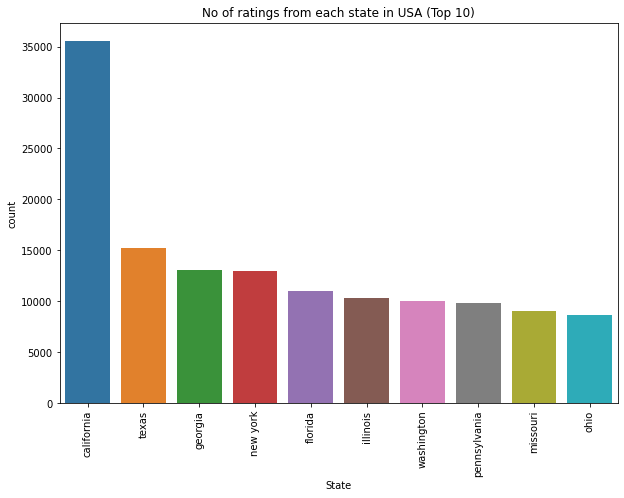

In [57]:
#plotting number of ratings from each state in USA
plt.figure(figsize=(10,7))
sns.countplot(x="State",order=df_['State'].value_counts().index[0:10],data=df).tick_params(axis='x', rotation=90)
plt.title("No of ratings from each state in USA (Top 10)")
plt.show()

###Findings:




* We have already seen that California is the state from which the highest number of ratings are given. Since California is a state in USA, it is obvious that California is the top state in USA on the basis of number of ratings given.


###**6. Age distribution**

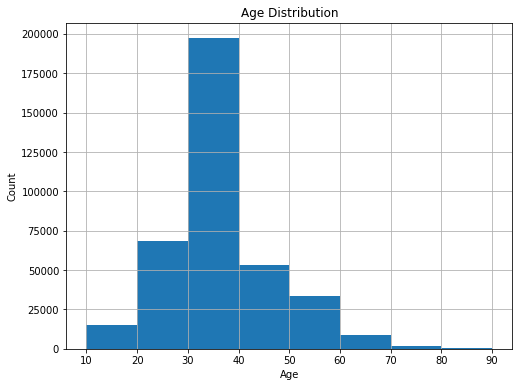

In [58]:
#plotting age distribution
plt.figure(figsize=(8,6))
df.Age.hist(bins=[10*i for i in range(1, 10)])     
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

###It can be observed that most of the ratings are given by people of age between 30-40 years. Now let us find out the most rated books by people of different age groups- Teenage, Youth, Middle-age and elderly.

In [59]:
#creating a subset with required columns
df2=df[['Book-Title','Book-Author','Age']]

In [60]:
#defining the category
category=pd.cut(df2['Age'],bins=[10,20,40,60,90],labels=['Teenage','Youth','Middle Age','Elderly'])

In [61]:
#creating a new column of age group
df2.insert(3,'Age Group',category)

In [62]:
#checking
df2.head()

,Book-Title,Book-Author,Age,Age Group
1,Clara Callan,Richard Bruce Wright,32,Youth
9,Where You'll Find Me: And Other Stories,Ann Beattie,32,Youth
12,The Middle Stories,Sheila Heti,32,Youth
13,Jane Doe,R. J. Kaiser,32,Youth
15,The Witchfinder (Amos Walker Mystery Series),Loren D. Estleman,32,Youth


In [63]:
#creating separate dataframes with details of each group
Youth_df=df2[df2['Age Group']=='Youth']
Teenage_df=df2[df2['Age Group']=='Teenage']
Middle_age_df=df2[df2['Age Group']=='Middle Age']
Elderly_df=df2[df2['Age Group']=='Elderly']

In [64]:
#creating function to plot most rated books by each age group
def books_by_age_group(category_df,title):
  plt.figure(figsize=(10,7))
  sns.countplot(x="Book-Title",order=category_df['Book-Title'].value_counts().index[0:10],data=category_df).tick_params(axis='x', rotation=90)
  plt.title(title)

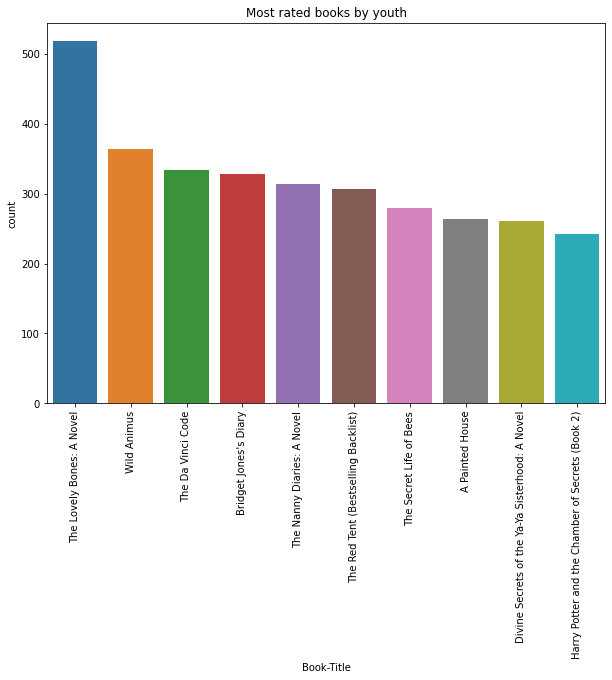

In [65]:
#most rated books by youth
books_by_age_group(Youth_df,'Most rated books by youth')

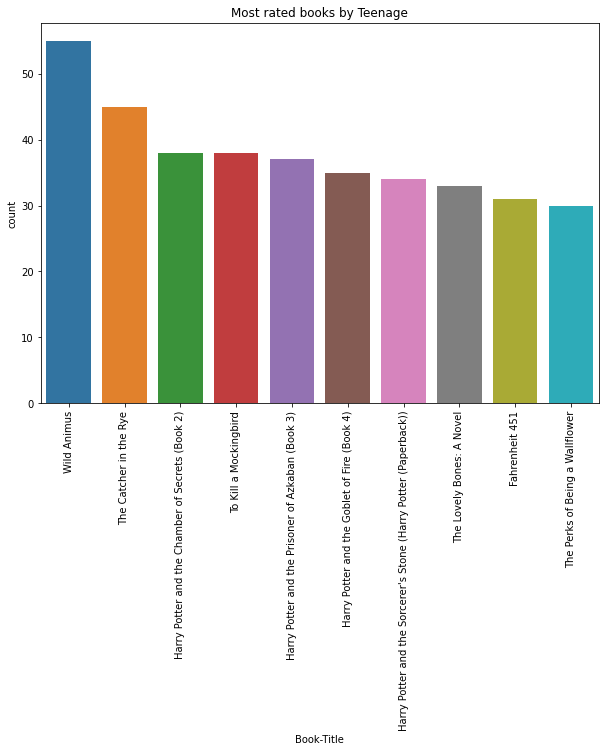

In [66]:
#most rated books by Teenage
books_by_age_group(Teenage_df,'Most rated books by Teenage')

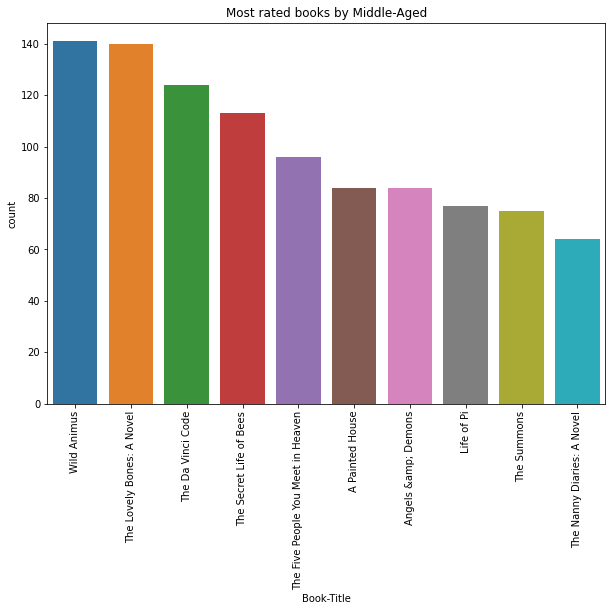

In [67]:
#most rated books by Middle-aged
books_by_age_group(Middle_age_df,'Most rated books by Middle-Aged')

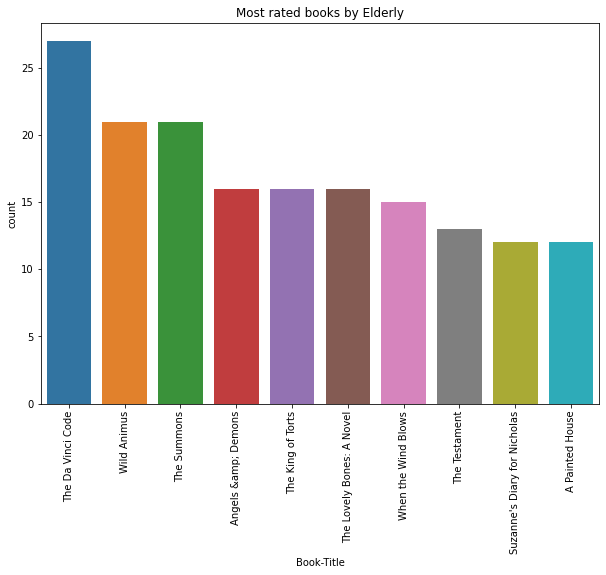

In [68]:
#most rated books by Middle-aged
books_by_age_group(Elderly_df,'Most rated books by Elderly')

###Findings:




* 'Wild animus' is one of the most rated books irrespective of the gender.





#**Recommendation System**

###Now let's build recommendation systems to recommend books to users based on their past preference.

##**1. Popularity Based Recommendation System**

###It is a type of recommendation system which works on the principle of popularity and or anything which is in trend.

In [69]:
# Top book based on rating
Top_Books= pd.DataFrame(df.groupby('Book-Title')['Book-Rating'].count()
                         .sort_values(ascending=False).head(10))
#renaming columns
Top_Books.rename(columns={'Book-Rating':'Number of Ratings'},inplace=True)
Top_Books.reset_index(inplace=True)

print('The Top 10 Books Recommendation : ')
Top_Books

The Top 10 Books Recommendation : 


,Book-Title,Number of Ratings
0,The Lovely Bones: A Novel,707
1,Wild Animus,581
2,The Da Vinci Code,495
3,The Secret Life of Bees,413
4,The Nanny Diaries: A Novel,393
5,The Red Tent (Bestselling Backlist),383
6,Bridget Jones's Diary,380
7,A Painted House,366
8,Life of Pi,337
9,Harry Potter and the Chamber of Secrets (Book 2),326


###These are the popular books based on the number of ratings received.

##**2. Simple Recommendation System**

###This method is based on the concept of weighted rating.

In [70]:
#creating dataframe with required columns
df1=df[["ISBN",'Book-Author','Book-Title','Book-Rating']]
#creating dataframe with vote average and number of ratings 
votes_df= df1.groupby(["ISBN",'Book-Title','Book-Author']).agg({'Book-Rating':"mean",'Book-Title':"count"})
#lenghth of votes_df
print('# of users: %d' % len(votes_df))
#renaming columns
votes_df.rename(columns={"Book-Rating":"Vote Average", "Book-Title":"Number of Votes"},inplace=True)
votes_df.reset_index(inplace=True)
#sorting values in descending order
votes_df.sort_values(by="Number of Votes",ascending=False)

# of users: 147013


,ISBN,Book-Title,Book-Author,Vote Average,Number of Votes
21565,0316666343,The Lovely Bones: A Novel,Alice Sebold,8.185290,707
115998,0971880107,Wild Animus,Rich Shapero,4.390706,581
38210,0385504209,The Da Vinci Code,Dan Brown,8.426230,488
17692,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,8.182768,383
4042,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,7.887500,320
...,...,...,...,...,...
61929,0552993360,To Be Young: Some Chapters of Autobiography,Mary Lutyens,3.000000,1
61928,0552993255,Quiet War of Rebecca Sheldon,Kathleen Rowntree,7.000000,1
61927,0552991872,The Right True End,Stan Barstow,9.000000,1
61926,0552990566,Brother of the More Famous Jack,Barbara Trapido,7.000000,1


In [71]:
# Calculate mean of vote average column
C = votes_df['Vote Average'].mean()
print("C:",C)
# Calculate the minimum number of votes required to be in the chart, m
m = votes_df['Number of Votes'].quantile(0.90)
print("m:",m)
# Filter out all qualified books into a new DataFrame
weighted_rating_df = votes_df.copy().loc[votes_df['Number of Votes'] >= m]
weighted_rating_df.shape

C: 7.528032305000495
m: 4.0


(18395, 5)

In [72]:
# Function that computes the weighted rating of each book
def weighted_rating(votes_df, m=m, C=C):
    v = votes_df['Number of Votes']
    R = votes_df['Vote Average']
    # Calculation of weighted average
    return (v/(v+m) * R) + (m/(m+v) * C)

In [73]:
# Define a new feature 'score' and calculate its value with weighted_rating()
weighted_rating_df['score'] = weighted_rating_df.apply(weighted_rating, axis=1)

In [74]:
#Sort books based on score calculated above
weighted_rating_df.sort_values('score', ascending=False,inplace=True)

#Print the top 15 books
weighted_rating_df[["ISBN",'Book-Title',"Book-Author", 'Vote Average', 'Number of Votes', 'score']].head(10)

,ISBN,Book-Title,Book-Author,Vote Average,Number of Votes,score
45823,0439425220,Harry Potter and the Chamber of Secrets Postcard Book,J. K. Rowling,9.869565,23,9.522671
70304,0618002235,"The Two Towers (The Lord of the Rings, Part 2)",J. R. R. Tolkien,9.720000,25,9.417660
2638,0060256656,The Giving Tree,Shel Silverstein,9.750000,20,9.379672
102335,0836213319,Dilbert: A Book of Postcards,Scott Adams,9.923077,13,9.359537
131090,1888054557,Postmarked Yesteryear: 30 Rare Holiday Postcards,Pamela E. Apkarian-Russell,10.000000,11,9.340809
23973,0345339738,"The Return of the King (The Lord of the Rings, Part 3)",J.R.R. TOLKIEN,9.402597,77,9.310026
102428,0836220889,Calvin and Hobbes,Bill Watterson,9.583333,24,9.289719
40331,0394800389,Fox in Socks (I Can Read It All by Myself Beginner Books),Dr. Seuss,9.785714,14,9.284007
102382,0836218221,The Authoritative Calvin and Hobbes (Calvin and Hobbes),Bill Watterson,9.600000,20,9.254672
86316,0743454529,"My Sister's Keeper : A Novel (Picoult, Jodi)",Jodi Picoult,9.545455,22,9.235082


###Now let's create variables to store book name and number of books to recommend. This input shall be used in the coming models.

In [75]:
#get book name and number of books to recommend
book_name = input("Enter a book name: ")
number = int(input("Enter number of books to recommend: "))

Enter a book name: Harry Potter and the Chamber of Secrets (Book 2)
Enter number of books to recommend: 10


##**3. Author-based Recommendation system**

###This model recommends the top books by the same author.

In [79]:
def author_based_recommendation(bookName,n):
  #Getting author name for the user input book
  author=weighted_rating_df.loc[weighted_rating_df['Book-Title'] == bookName].reset_index(drop = True).iloc[0]['Book-Author']

  print("The author of",bookName,"is",author)
  print("Top books by the same author are:\n")
  
  #Storing books written by the same author
  books_by_same_author_df = weighted_rating_df[weighted_rating_df['Book-Author'] == author]
  #Sorting books based on their average rating
  books_by_same_author_df = books_by_same_author_df.sort_values(by=['Vote Average'])
  recommended_books=[]
  w=0
  for i in books_by_same_author_df["Book-Title"]:
        #Avoiding recommending the same user input book aswell as repetation of recomendation and limitting number of recommendation
        #Stops when the number of recommendation  reaches total number of books written by the author
        if (i!= bookName) and (i not in recommended_books) and (len(recommended_books) < n) and (w<=len(books_by_same_author_df["Book-Title"])):
            recommended_books.append(i)
            w+=1
  
  for book in recommended_books:
    print(book)
  return recommended_books
  return recommended_books


In [80]:
# get recommendation
author_based=author_based_recommendation(book_name,number)

The author of Harry Potter and the Chamber of Secrets (Book 2) is J. K. Rowling
Top books by the same author are:

Harry Potter et le prisonnier d'Azkaban
Fantastic Beasts and Where to Find Them
Quidditch Through the Ages
Harry Potter y la cÃ¡mara secreta
Harry Potter y el cÃ¡liz de fuego
Harry Potter y la piedra filosofal
Harry Potter Y El Prisionero De Azkaban
Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))
Harry Potter and the Goblet of Fire (Book 4)
Harry Potter and the Sorcerer's Stone (Book 1)
